In [520]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [521]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [522]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [523]:
df.info() #for datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [524]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [525]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

# **STEP 1: RESOLVING NULL VALUES**

In [526]:
df.drop(columns=['society'],inplace=True)

In [527]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [528]:
df['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [529]:
df['size_numbers'] = df['size'].map(lambda x: int(re.search(r'\d+', str(x)).group()) if pd.notnull(x) and re.search(r'\d+', str(x)) else None)


In [530]:
df = df.dropna(subset=['location'])
df.isnull().sum()


area_type         0
availability      0
location          0
size             16
total_sqft        0
bath             73
balcony         609
price             0
size_numbers     16
dtype: int64

In [531]:
df

,area_type,availability,location,size,total_sqft,bath,balcony,price,size_numbers
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,2.0
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,NaN,400.00,4.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4.0


In [532]:
df.drop(columns=['size'],inplace=True)

C:\Users\abhin\AppData\Local\Temp\ipykernel_5288\1945786054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['size'],inplace=True)


In [533]:

df.isnull().sum()


area_type         0
availability      0
location          0
total_sqft        0
bath             73
balcony         609
price             0
size_numbers     16
dtype: int64

In [534]:
df = df.dropna(subset=['size_numbers'])



In [535]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')

C:\Users\abhin\AppData\Local\Temp\ipykernel_5288\329291012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')


In [536]:
df['bath'] = df['bath'].fillna(df['bath'].mode()[0])
df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])



C:\Users\abhin\AppData\Local\Temp\ipykernel_5288\2929235574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath'] = df['bath'].fillna(df['bath'].mode()[0])
C:\Users\abhin\AppData\Local\Temp\ipykernel_5288\2929235574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balcony'] = df['balcony'].fillna(df['balcony'].mode()[0])


In [537]:
df.sample(5)

,area_type,availability,location,total_sqft,bath,balcony,price,size_numbers
4070,Super built-up Area,Ready To Move,Jigani,1252.0,3.0,3.0,61.0,3.0
6529,Super built-up Area,Ready To Move,BTM Layout,1020.0,2.0,1.0,46.5,2.0
7319,Super built-up Area,Ready To Move,CV Raman Nagar,1051.0,2.0,3.0,61.0,2.0
2477,Super built-up Area,Ready To Move,Kaval Byrasandra,1200.0,2.0,1.0,49.5,2.0
8638,Super built-up Area,Ready To Move,Vidyaranyapura,1100.0,2.0,1.0,54.0,2.0


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13303 non-null  object 
 1   availability  13303 non-null  object 
 2   location      13303 non-null  object 
 3   total_sqft    13064 non-null  float64
 4   bath          13303 non-null  float64
 5   balcony       13303 non-null  float64
 6   price         13303 non-null  float64
 7   size_numbers  13303 non-null  float64
dtypes: float64(5), object(3)
memory usage: 935.4+ KB


In [539]:
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

C:\Users\abhin\AppData\Local\Temp\ipykernel_5288\1028412009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())


In [540]:
df['price_per_sqft']=df['price']/df['total_sqft']

C:\Users\abhin\AppData\Local\Temp\ipykernel_5288\1583294256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_per_sqft']=df['price']/df['total_sqft']


In [541]:
df

,area_type,availability,location,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,0.036998
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,0.046154
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,0.043056
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,0.062459
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,2.0,0.042500
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,3453.0,4.0,0.0,231.00,5.0,0.066898
13316,Super built-up Area,Ready To Move,Richards Town,3600.0,5.0,2.0,400.00,4.0,0.111111
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2.0,0.052585
13318,Super built-up Area,18-Jun,Padmanabhanagar,4689.0,4.0,1.0,488.00,4.0,0.104073


In [542]:
df.isnull().sum()

area_type         0
availability      0
location          0
total_sqft        0
bath              0
balcony           0
price             0
size_numbers      0
price_per_sqft    0
dtype: int64

In [543]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       '19-May', '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct',
       '21-Jan', '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul',
       '21-Nov', '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep',
       '21-Aug', '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun',
       '17-Feb', '20-Nov', '20-Jul', '16-Sep', '15-Oct', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

In [544]:
df = df.drop('availability', axis=1)


**ALL THE NULL VALUES ARE RESOLVED**

# **STEP 2: OUTLIER DETECTION**

In [545]:
df.describe()


,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
count,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000
mean,1554.543413,2.689619,1.602872,112.584033,2.803728,0.079432
std,1227.293905,1.339393,0.803455,148.993820,1.295022,1.063166
min,1.000000,1.000000,0.000000,8.000000,1.000000,0.002678
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,0.042502
50%,1285.000000,2.000000,2.000000,72.000000,3.000000,0.054463
75%,1656.000000,3.000000,2.000000,120.000000,3.000000,0.073628
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,120.000000


### Data Summary and Insights

#### Key Statistics:
1. **`total_sqft` (Total Square Feet)**:
   - **Mean**: 1554.54 sqft
   - **Range**: 1 - 52,272 sqft
   - **High Variation**: High standard deviation (1227.29) indicates diverse property sizes.

2. **`bath` (Number of Bathrooms)**:
   - **Mean**: 2.69 bathrooms
   - **Range**: 1 - 40 bathrooms (possible outliers or luxury properties)
   - **High Variation**: Standard deviation of 1.34 suggests variability in bathroom counts.

3. **`balcony` (Number of Balconies)**:
   - **Mean**: 1.6 balconies
   - **Range**: 0 - 3 balconies
   - **Low Variation**: Lower variability compared to `bath`.

4. **`price` (Price in Currency)**:
   - **Mean**: 112.58
   - **Range**: 8 - 3600
   - **High Variation**: High standard deviation (148.99) indicates a wide range of property prices.

5. **`size_numbers` (Size Number/Bedrooms)**:
   - **Mean**: 2.8
   - **Range**: 1 - 43
   - **Variation**: Some outliers with very large property sizes.

6. **`price_per_sqft` (Price per Square Foot)**:
   - **Mean**: 0.079
   - **Range**: 0.0027 - 120
   - **High Variation**: High standard deviation (1.06), indicating significant differences in price per sqft.

#### Key Insights:
- **Wide Price Range**: There is a large disparity in both price and price per square foot, indicating a mix of budget and luxury properties.
- **High Variability in Size**: The dataset includes both very small and very large properties.
- **Outliers**: Some extreme values in `total_sqft`, `bath`, and `price` need further investigation.
- **Data Skewness**: `price` and `price_per_sqft` might benefit from transformation (e.g., log transformation) to normalize distributions.
- **Feature Distributions**: Most properties have 1 to 3 bathrooms and 1 to 2 balconies.

#### Next Steps:
1. **Handle Outliers**: Identify and handle extreme values in `price`, `total_sqft`, `bath`, `size_numbers`.
2. **Data Visualization**: Use histograms, box plots, and scatter plots to explore feature distributions and relationships.
3. **Feature Engineering**: Create new features like `price_per_sqft` ratio or group properties by `area_type`.
4. **Correlation Analysis**: Analyze correlations between features (e.g., `total_sqft` vs. `price`, `size_numbers` vs. `price_per_sqft`).
5. **Scaling/Normalization**: Normalize numerical features (`price`, `total_sqft`, `size_numbers`) for model preparation.
6. **Modeling**: Prepare the data for modeling and experiment with regression models to predict `price` or `price_per_sqft`.


In [546]:
df.shape

(13303, 8)

<Axes: xlabel='price', ylabel='Count'>

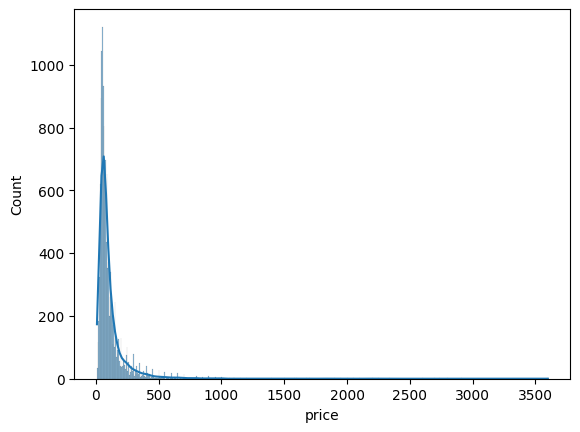

In [547]:
sns.histplot(df['price'], kde=True)


<Axes: xlabel='size_numbers', ylabel='Count'>

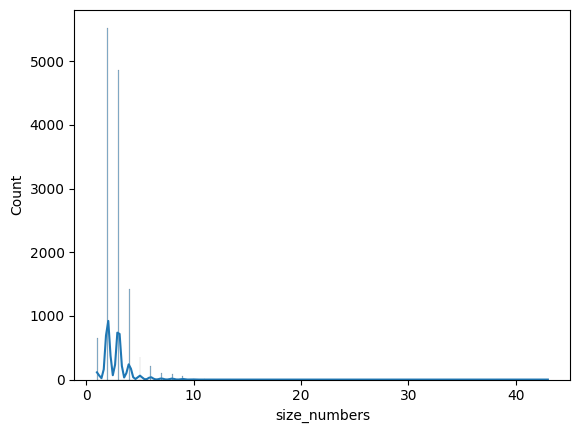

In [548]:
sns.histplot(df['size_numbers'], kde=True)


<Axes: xlabel='bath', ylabel='Count'>

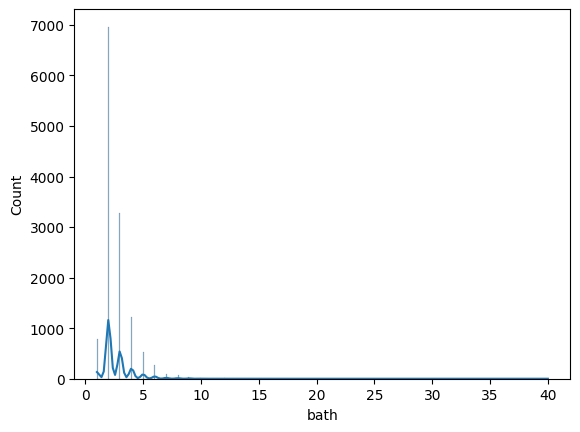

In [549]:
sns.histplot(df['bath'], kde=True)

In [550]:
Q1 = df['total_sqft'].quantile(0.25)
Q3 = df['total_sqft'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['total_sqft'] >= Q1 - 1.5 * IQR) & (df['total_sqft'] <= Q3 + 1.5 * IQR)]


In [551]:
df.shape

(12096, 8)

In [552]:
df.describe()

,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
count,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000
mean,1319.667049,2.510251,1.571098,87.132246,2.660714,0.064528
std,399.031439,1.161200,0.790333,70.361471,1.179106,0.043514
min,276.000000,1.000000,0.000000,8.000000,1.000000,0.005000
25%,1089.000000,2.000000,1.000000,48.000000,2.000000,0.041904
50%,1243.000000,2.000000,2.000000,67.000000,2.000000,0.052862
75%,1554.543413,3.000000,2.000000,100.000000,3.000000,0.069669
max,2489.000000,40.000000,3.000000,1250.000000,43.000000,1.764706


In [553]:
from scipy import stats
df = df[(stats.zscore(df['bath']) < 3)]

In [554]:
df.shape

(11784, 8)

In [555]:
df.describe()

,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
count,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000,11784.000000
mean,1318.145438,2.386117,1.562797,84.373018,2.545401,0.062455
std,395.532739,0.790397,0.782973,66.554612,0.842302,0.040752
min,276.000000,1.000000,0.000000,8.000000,1.000000,0.005000
25%,1088.000000,2.000000,1.000000,47.880000,2.000000,0.041667
50%,1245.000000,2.000000,2.000000,65.400000,2.000000,0.052307
75%,1554.000000,3.000000,2.000000,98.000000,3.000000,0.067904
max,2489.000000,5.000000,3.000000,1250.000000,9.000000,1.764706


**OUTLIERS TREATMENT SUCCESSFULLY DONE**

In [556]:
df.dtypes

area_type          object
location           object
total_sqft        float64
bath              float64
balcony           float64
price             float64
size_numbers      float64
price_per_sqft    float64
dtype: object

In [557]:
from sklearn.preprocessing import StandardScaler


numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()


df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


In [558]:
df

,area_type,location,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
0,Super built-up Area,Electronic City Phase II,-0.662794,-0.488530,-0.718825,-0.680718,-0.647540,-0.624713
2,Built-up Area,Uttarahalli,0.308090,-0.488530,1.835649,-0.336175,0.539734,-0.476064
3,Super built-up Area,Lingadheeranahalli,0.512886,0.776710,-0.718825,0.159680,0.539734,0.000091
4,Super built-up Area,Kothanur,-0.298712,-0.488530,-0.718825,-0.501459,-0.647540,-0.489697
5,Super built-up Area,Whitefield,-0.374562,-0.488530,-0.718825,-0.696796,-0.647540,-0.735620
...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Bellandur,-0.141955,-0.488530,0.558412,-0.561563,-0.647540,-0.618716
13313,Super built-up Area,Uttarahalli,0.067898,-0.488530,-0.718825,-0.411304,0.539734,-0.492662
13314,Super built-up Area,Green Glen Layout,1.003384,0.776710,1.835649,0.415120,0.539734,0.069962
13317,Built-up Area,Raja Rajeshwari Nagar,-0.447884,-0.488530,-0.718825,-0.366226,-0.647540,-0.242202


In [559]:
df['location'].value_counts()

location
Whitefield                        448
Sarjapur  Road                    340
Electronic City                   300
Kanakpura Road                    266
Thanisandra                       224
                                 ... 
GB Palya                            1
1A Block Koramangala                1
asha township, off hennur road      1
Escorts Colony                      1
Abshot Layout                       1
Name: count, Length: 1192, dtype: int64

In [560]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [561]:
for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        df[col] = encoder.fit_transform(df[col])


In [562]:
df

,area_type,location,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
0,3,379,-0.662794,-0.488530,-0.718825,-0.680718,-0.647540,-0.624713
2,0,1075,0.308090,-0.488530,1.835649,-0.336175,0.539734,-0.476064
3,3,694,0.512886,0.776710,-0.718825,0.159680,0.539734,0.000091
4,3,657,-0.298712,-0.488530,-0.718825,-0.501459,-0.647540,-0.489697
5,3,1143,-0.374562,-0.488530,-0.718825,-0.696796,-0.647540,-0.735620
...,...,...,...,...,...,...,...,...
13312,3,210,-0.141955,-0.488530,0.558412,-0.561563,-0.647540,-0.618716
13313,3,1075,0.067898,-0.488530,-0.718825,-0.411304,0.539734,-0.492662
13314,3,432,1.003384,0.776710,1.835649,0.415120,0.539734,0.069962
13317,0,888,-0.447884,-0.488530,-0.718825,-0.366226,-0.647540,-0.242202


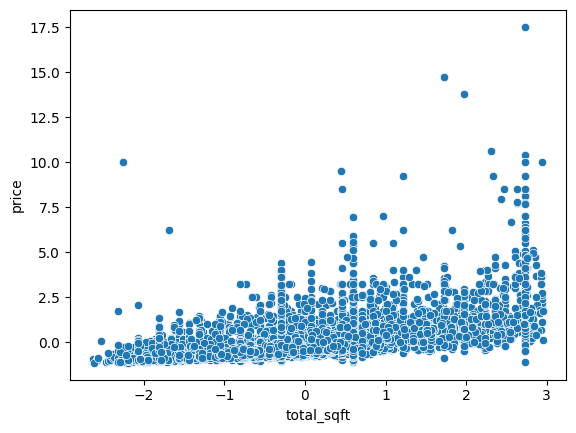

In [563]:
sns.scatterplot(x=df['total_sqft'], y=df['price'])
plt.show()

In [565]:
df.corr()

,area_type,location,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
area_type,1.000000,0.040584,0.052332,-0.037732,0.111263,-0.044442,-0.058947,-0.094315
location,0.040584,1.000000,0.024500,0.003574,-0.003889,-0.017938,-0.005517,-0.018113
total_sqft,0.052332,0.024500,1.000000,0.550203,0.280538,0.568365,0.496183,0.127069
bath,-0.037732,0.003574,0.550203,1.000000,0.243043,0.532312,0.804688,0.387642
balcony,0.111263,-0.003889,0.280538,0.243043,1.000000,0.109407,0.213734,0.003244
price,-0.044442,-0.017938,0.568365,0.532312,0.109407,1.000000,0.501142,0.803537
size_numbers,-0.058947,-0.005517,0.496183,0.804688,0.213734,0.501142,1.000000,0.385187
price_per_sqft,-0.094315,-0.018113,0.127069,0.387642,0.003244,0.803537,0.385187,1.000000


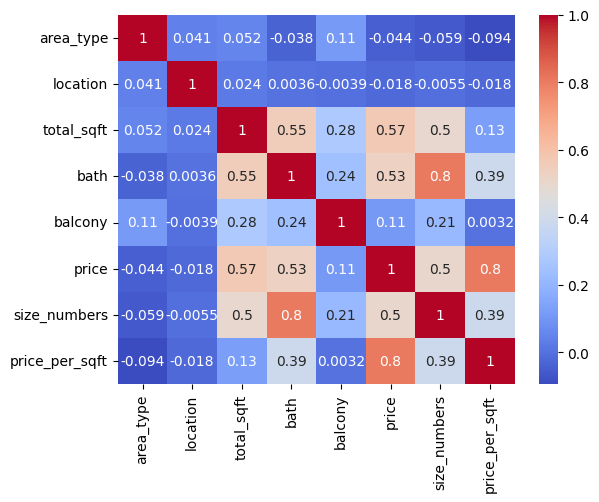

In [564]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [566]:
df

,area_type,location,total_sqft,bath,balcony,price,size_numbers,price_per_sqft
0,3,379,-0.662794,-0.488530,-0.718825,-0.680718,-0.647540,-0.624713
2,0,1075,0.308090,-0.488530,1.835649,-0.336175,0.539734,-0.476064
3,3,694,0.512886,0.776710,-0.718825,0.159680,0.539734,0.000091
4,3,657,-0.298712,-0.488530,-0.718825,-0.501459,-0.647540,-0.489697
5,3,1143,-0.374562,-0.488530,-0.718825,-0.696796,-0.647540,-0.735620
...,...,...,...,...,...,...,...,...
13312,3,210,-0.141955,-0.488530,0.558412,-0.561563,-0.647540,-0.618716
13313,3,1075,0.067898,-0.488530,-0.718825,-0.411304,0.539734,-0.492662
13314,3,432,1.003384,0.776710,1.835649,0.415120,0.539734,0.069962
13317,0,888,-0.447884,-0.488530,-0.718825,-0.366226,-0.647540,-0.242202


In [567]:
from sklearn.model_selection import train_test_split

In [569]:
X=df.drop('price',axis=1)

In [570]:
y=df['price']

In [571]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [572]:
from sklearn.linear_model import LinearRegression

In [573]:
model=LinearRegression()

In [574]:
model.fit(X_train,y_train)

LinearRegression()

In [575]:
y_pred = model.predict(X_test)


In [579]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicting the target values on the test set
y_pred = model.predict(X_test)

# R-squared (already computed)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')


R-squared: 0.8972858569324618
Mean Absolute Error: 0.15213055121754726
Mean Squared Error: 0.10378568169665676
Root Mean Squared Error: 0.3221578521418604
